# Homework set 2

Please **submit this Jupyter notebook through Canvas** no later than **Thursday November 14**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Run the following cell to import NumPy, Matplotlib and some other functions.

In [100]:
import math
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

---

# Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


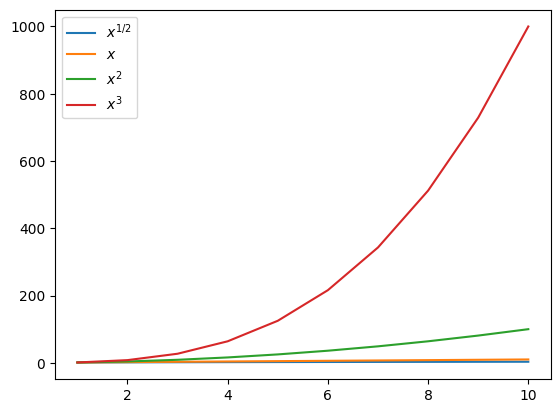

In [101]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

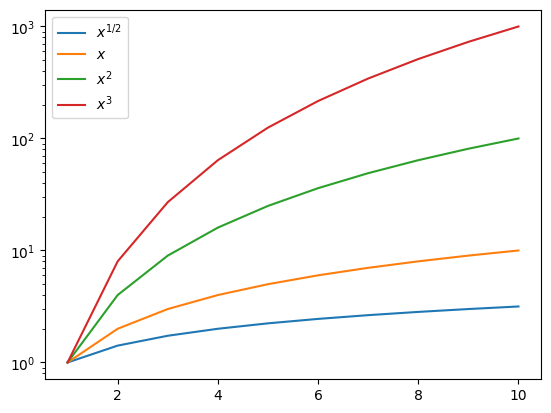

In [102]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


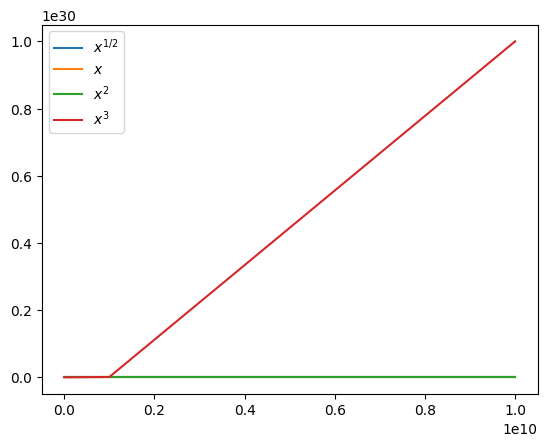

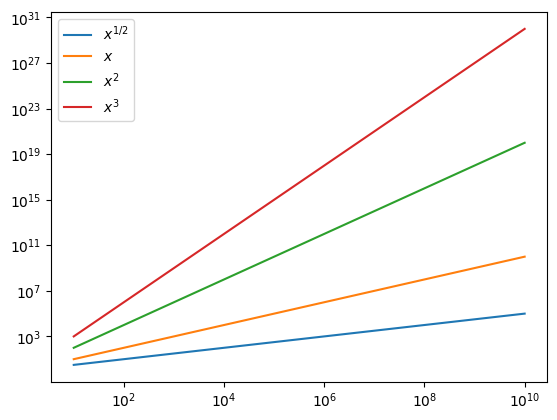

In [103]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Plots of arbitrary curves in the $(x,y)$ plane

So far, in all our plots, $y$ was a function of $x$. But this is not the only possibility. One can draw arbitrary curves in the $(x,y)$ plane. Next are two examples

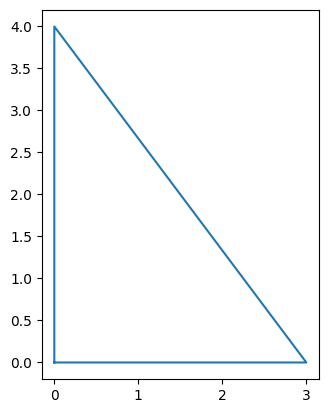

In [104]:
# plot a triangle
x = [0, 3, 0, 0]
y = [0, 0, 4, 0]
plt.plot(x,y)
# set aspect ratio to one
plt.gca().set_aspect('equal')

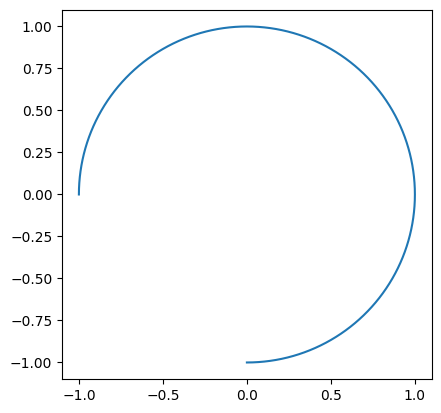

In [105]:
# we plot three quarters of a circle from (0,-1) going counter clockwise to (-1,0)
t = np.linspace(-0.5*np.pi, np.pi, 271)
x = np.cos(t)    
y = np.sin(t)
plt.plot(x,y)
# set the aspectratio to 1 so that it truely looks like a circle
plt.gca().set_aspect('equal')

---

# Exercise 1

Show that the Gram–Schmidt orthogonalization of an $m \times m$ matrix requires approximately $m^3$ multiplications and $m^3$ additions.


Taking Algorithm 3.2 from Heath's:
```rust
1: for k=1 to m
2:     q_k = a_k
3:     for j=1 to k-1
4:         R[j,k] = q_j * a_k // inner product
5:         q_k = q_k - R[j,k] * q_j
6:     R[k,k] = sqrt(q_k * q_k)
7:     if R[k,k] == 0
8:         break
9:     q_k = q_k / R[k,k]
```
Add operations occur on lines 4, 5, 6 and 9 

Lines 6 and 9 runs $m$ times, due to loop 1

Lines 4 and 5 run $m \cdot \frac{1}{2} (m-1) = \frac{1}{2} m (m-1)$ times, due to loops 1 and 3

Therefore, the amount of multiplies and adds in line 4 and 5 are dominant over the total amount

The amount of multiplies and adds in line 4 and 5 are approximately the same. therefore, we will only count the amounts of line 4

Line 4 is an inner product of two $m$-vectors, which consists of $m$ multiplies and $m-1$ adds

This amounts to:
- multiplications: $m \cdot \frac{1}{2} m (m-1)=\frac{1}{2} m^2 (m-1) \sim m^3$
- additions: $(m-1) \cdot \frac{1}{2} m (m-1)=\frac{1}{2} m (m-1)^2 \sim m^3$


-----
# Exercise 2
We want to reconstruct a function $s(t)$ (also called the signal in this exercise), $t \in [0,1]$, from data given by
$$d(t) = \int_0^t s(r) \, dr + \text{noise}.$$
We assume the data is given at $n$ equally space time points $t_j = j h$, $h = \frac{1}{n}$, $j=1,2, \ldots, n$. The data is therefore a vector $d = [d_1, \ldots, d_n]$, where $d_j$ denotes the value at $t_j$. 
The signal $s$ is to be reconstructed at time points 
$t_{j-1/2} = (j-1/2)h$ for $j = 1,2, \ldots, n$. It is described by a vector $s = [s_1, \ldots, s_n]$ with $s_j$ the value at $t_{j-1/2}$.
Numerical integration is described in Chapter 8 of the book by Heath. Using the composite midpoint rule, the vectors $s$ and $d$ are related by
$$d = A \cdot s + \text{noise}$$
where
$$A = \begin{bmatrix} 
h & 0 & 0 & \ldots & 0 \\
h & h & 0 & \ldots & 0 \\
h & h & h & \ddots &  \vdots \\
\vdots & \vdots & \ddots & \ddots & 0 \\
h & h & \ldots & h  & h 
\end{bmatrix}.$$


## (a)
As a test signal we take
$$s_{\rm true}(t) = \left\{
\begin{array}{ll} 
1 & \text{if $0.05 \le |t-1/2|<0.15$}\\
0.7 & \text{if $|t-1/2|<0.05$}\\
0 & \text{otherwise} \end{array} 
\right. .$$ 
Generate data $d_0$ without noise and data $d_\epsilon$ with noise, where the noise is normally distributed, with mean zero and standard deviation $\epsilon = 0.005$.
Take for example $n=100$. Plot the data.

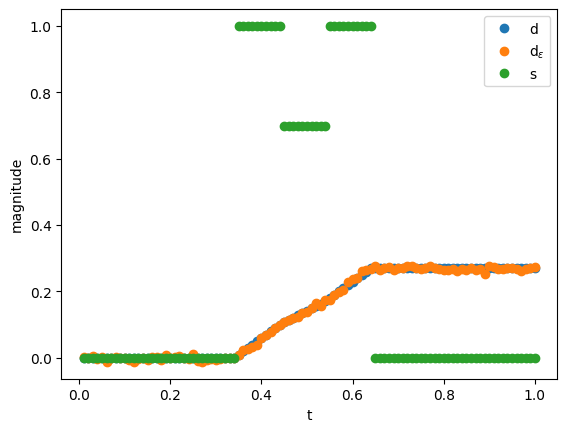

In [106]:
@np.vectorize
def s_true(t):
    if 0.05 <= abs(t - 0.5) < 0.15:
        return 1.0
    elif abs(t - 0.5) < 0.05:
        return 0.7
    else:
        return 0.0

n = 100
h = 1 / n
epsilon = 0.005

t = np.linspace(h, 1.0, n)
A = h * np.tri(n)
s = s_true(t)
d = A @ s   # d = np.cumsum(h * s)
noise = np.random.normal(0.0, epsilon, d.shape)
d_e = d + noise

plt.plot(t, d, "o", label="d")
plt.plot(t, d_e, "o", label="d$_\\epsilon$")
plt.plot(t, s, "o", label="s")
plt.legend()
plt.xlabel("t")
plt.ylabel("magnitude")
# plt.title("")
plt.show()

## (b)
Try to determine $s$ from $d_0$ by inverting the matrix $A$, ignoring the noise term.
Do the same with $d_\epsilon$ instead of $d_0$. Plot the results. What do you observe about the errors in the inversion?

You may use a library routine for matrix inversion/solving a linear system.

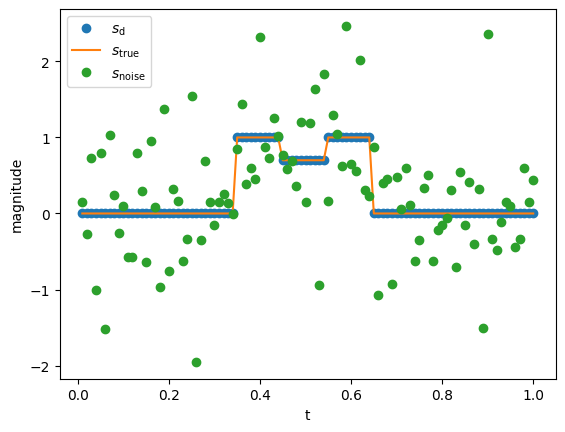

In [107]:
solved_s = np.linalg.solve(A, d)
noised_s = np.linalg.solve(A, d_e)
plt.plot(t, solved_s, "o", label="$s_\\text{d}$")
plt.plot(t, s, "-", label="$s_\\text{true}$")
plt.plot(t, noised_s, "o", label="$s_\\text{noise}$")
plt.legend()
plt.xlabel("t")
plt.ylabel("magnitude")
# plt.title("")
plt.show()

## (c)
One way to address the issue just observed is by truncated SVD regularization. Suppose $A = U \Sigma V^T$ is the singular value decomposition of $A$. 

Express the inverse $A^{-1}$ in terms of $U, V$ and $\Sigma$, or in terms of $U$, $V$ and the singular values.

Let $k$ be some integer less or equal than $n$. Denote by $B_k$ the matrix that is obtained from $A$ by setting the smallest $n-k$ singular values to zero (and keeping $U$, $V$ and the first $k$ singular values the same). 

In truncated SVD regularization, an estimate for $s$ is obtained by applying the pseudoinverse $B_k^{+}$ to the data (instead of the true inverse $A^{-1}$) (see section 3.6 of Heath). Try truncated SVD regularization for various values of $k$. Show that for certain values of $k$ the result obtained by truncated SVD regularization is a "better" approximation of the true signal than the result obtained by the true inverse $A^{-1}$.
Note that better can mean different things, it can mean "visually better" or "quantitatively better" in some norm to be specified, try to be precise in what you write down.

What happens if you choose $k$ too small?

You may use library routines to compute the SVD.

*Text part of your answer here*

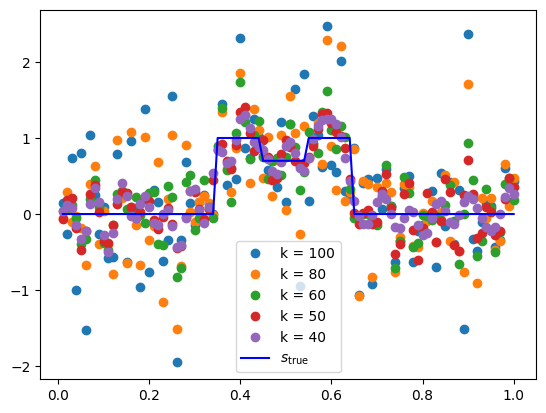

In [ ]:
U, S, Vh = np.linalg.svd(A, full_matrices=True)

reshaped_S = S.reshape((100, 1))

n=len(reshaped_S)
matrix_S = np.zeros((n,n))
np.fill_diagonal(matrix_S, reshaped_S)

A_inv = Vh.T @ np.linalg.inv(matrix_S) @ U.T

threshold = 1e-5
A_inv_cleaned = np.where(np.abs(A_inv) < threshold, 0, A_inv)

#print(A_inv)
#print(A_inv_cleaned)

k_values = [100, 80, 60, 50, 40]
def truncation(matrix_S, k):
    truncated_s = np.zeros_like(matrix_S)
    truncated_s[:k, :k] = matrix_S[:k, :k]
    
    #truncated_s[-k:, -k:] = 0
    #truncated_U = truncated_U[:, -k:]
    #truncated_Vh = truncated_Vh[-k:, :]

    return truncated_s

for k in k_values:
    truncated_s = truncation(matrix_S, k)
    #print(truncated_s.shape)
    #print(truncated_U.shape)
    #print(truncated_Vh.shape)
    #print(truncated_s)
    #print(k)
    b_k = U @ truncated_s @ Vh
    threshold = 1e-3
    b_k_cleaned = np.where(np.abs(b_k) < threshold, 0, b_k)
    #inv_b_k = np.linalg.inv(b_k)
    s_new_noise = Vh.T @ la.pinv(truncated_s) @ U.T @ d_e
    s_new = Vh.T @ la.pinv(truncated_s) @ U.T @ d
    

    d_new = b_k @ s
    
    plt.plot(t, s_new_noise, "o", label=f"{k = }")

plt.plot(t, s, "b-", label="$s_\\text{true}$")
plt.legend()
plt.show()
    


## (d)

Make a plot of the singular values of $A$. Explain your findings in (b) and (c). Part of your explanation should refer to the plot.

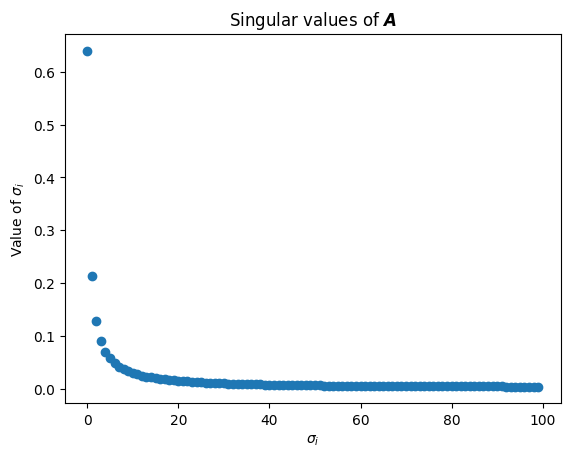

In [116]:
plt.plot(S, "o")

plt.xlabel("$\\sigma_i$")
plt.ylabel("Value of $\\sigma_i$")
plt.title("Singular values of $\\mathbfit{A}$")
plt.show()


*Text part of your answer here*